In [1]:
cd ..

C:\Users\remil\Documents\GitHub\GenComp\code


In [2]:
import numpy as np
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

from evaluation import plot_edges, plot_clusters, remove_consecutive_duplicates, run_evaluation, number_of_clusters

Graph 0: Number of clusters = 7
Graph 1: Number of clusters = 2
Graph 2: Number of clusters = 1
Graph 3: Number of clusters = 2
Final Composition Ratio: 0.8333333333333334
Mean Edge Retention Ratio: 0.8888888888888888
Mean Compositional Score: (0.023809523809523798, [-0.42857142857142855, 1, -0.5])


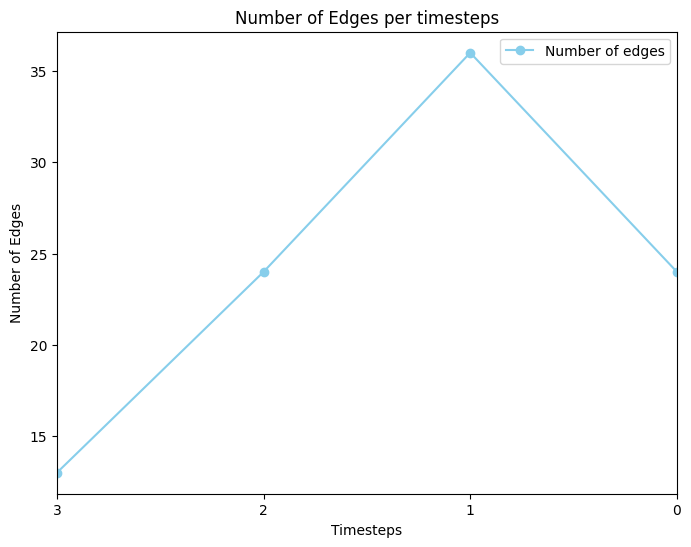

In [3]:
# Create test graphs using kNN (k-nearest neighbor) for various k values
def create_knn_graph(points, k):
    knn = NearestNeighbors(n_neighbors=k+1)  # k+1 because we include the point itself
    knn.fit(points)
    distances, indices = knn.kneighbors(points)

    G = nx.Graph()

    # Add nodes (points)
    for i, point in enumerate(points):
        G.add_node(i, pos=(point[0], point[1]))

    # Add edges based on kNN results
    for i, neighbors in enumerate(indices):
        for j in neighbors[1:]:  # Skip the first neighbor (itself)
            G.add_edge(i, j)

    return G

# Step 1: Generate random 2D points
np.random.seed(42)
points = np.random.rand(20, 2)  # 10 random 2D points

# Step 2: Create multiple graphs for different values of k
k_values = [1, 2, 3, 2]  # Different k values to simulate "timesteps"
Gs = [create_knn_graph(points, k) for k in k_values]

# Test the functions

# Number of clusters for each graph
for i, G in enumerate(Gs):
    print(f'Graph {i}: Number of clusters = {number_of_clusters(G)}')

# Edge retention ratio
run_evaluation(Gs)
# Plot the comparison of number of edges over time
plot_edges(Gs)

In [4]:
def plot_graph(G, title):
    """Plot the graph G."""
    pos = nx.get_node_attributes(G, 'pos')

    plt.figure()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
    plt.title(title)
    plt.ylim((-1, 4))
    plt.xlim((-1, 4))
    plt.gca().set_aspect('equal', adjustable='box')  # Maintain equal aspect ratio
    plt.show()

def scale_graph(G, scale_factor, target=(1.5, 1.5)):
    """Scale the positions of nodes in the graph G towards a target point."""
    G_scaled = G.copy()

    for i in G_scaled.nodes:
        x, y = G_scaled.nodes[i]['pos']

        # Scale the difference between the current position and the target
        new_x = target[0] + (x - target[0]) * scale_factor
        new_y = target[1] + (y - target[1]) * scale_factor

        # Update the position
        G_scaled.nodes[i]['pos'] = (new_x, new_y)

    return G_scaled


def add_dist_edges(G, distance_threshold):
    """Create edges based on distance between nodes in the graph G."""
    pos = nx.get_node_attributes(G, 'pos')

    # Create edges based on distance
    for i in G.nodes:
        for j in G.nodes:
            if i != j:
                distance = np.linalg.norm(np.array(pos[i]) - np.array(pos[j]))
                if distance < distance_threshold:
                    G.add_edge(i, j)



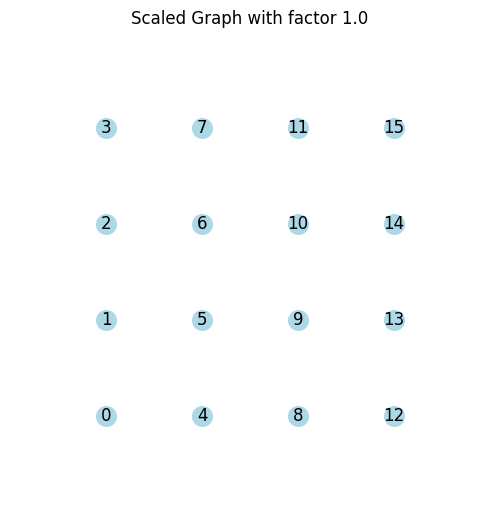

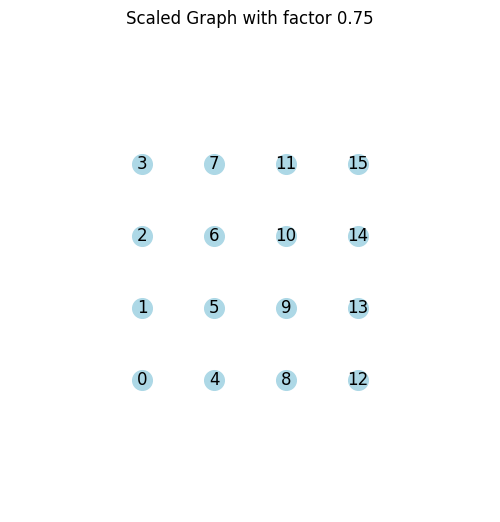

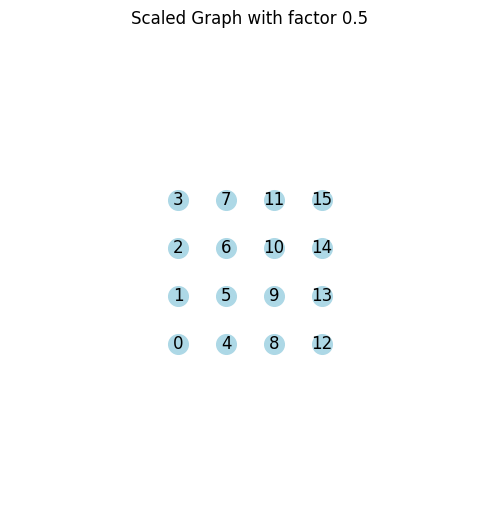

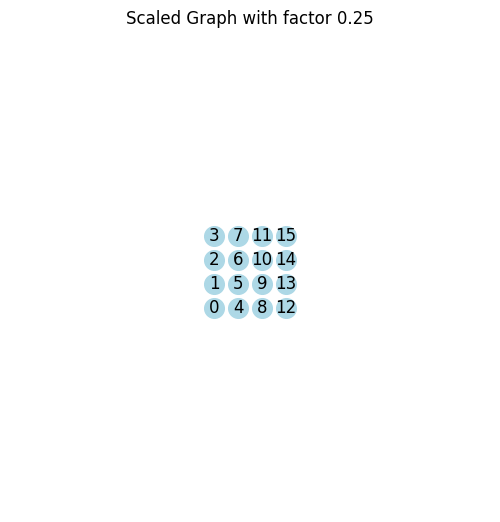

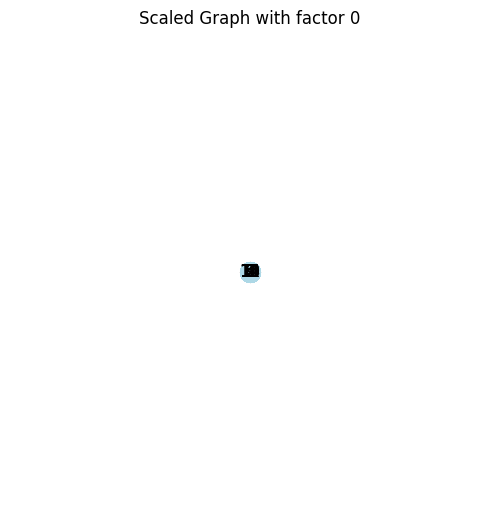

In [5]:
G = nx.Graph()
grid_points = [(i, j) for i in range(4) for j in range(4)]  # 2 rows and 4 columns
for i, point in enumerate(grid_points):
    G.add_node(i, pos=point)

# Define scale factors to test
scale_factors = reversed([0, 0.25, 0.5, 0.75, 1.0])  # Different scale factors
graph_diffusion = []

# Scale the graph and plot for each scale factor
for scale in scale_factors:
    G_scaled = scale_graph(G, scale)
    add_dist_edges(G_scaled, 0.2)
    graph_diffusion.append(G_scaled)
    plot_graph(G_scaled, f'Scaled Graph with factor {scale}')



In [6]:
def comp_first_pass(G):

    G_copy = G.copy()

    G_copy.nodes[0]["pos"] = (0, 0.5)
    G_copy.nodes[1]["pos"] = (0, 0.5)

    G_copy.nodes[2]["pos"] = (0, 2.5)
    G_copy.nodes[3]["pos"] = (0, 2.5)

    G_copy.nodes[4]["pos"] = (1, 0.5)
    G_copy.nodes[5]["pos"] = (1, 0.5)

    G_copy.nodes[6]["pos"] = (1, 2.5)
    G_copy.nodes[7]["pos"] = (1, 2.5)

    G_copy.nodes[8]["pos"] = (2, 0.5)
    G_copy.nodes[9]["pos"] = (2, 0.5)

    G_copy.nodes[10]["pos"] = (2, 2.5)
    G_copy.nodes[11]["pos"] = (2, 2.5)

    G_copy.nodes[12]["pos"] = (3, 0.5)
    G_copy.nodes[13]["pos"] = (3, 0.5)

    G_copy.nodes[14]["pos"] = (3, 2.5)
    G_copy.nodes[15]["pos"] = (3, 2.5)

    return G_copy

def comp_second_pass(G):

        G_copy = G.copy()

        G_copy.nodes[0]["pos"] = (0, 1.5)
        G_copy.nodes[1]["pos"] = (0, 1.5)
        G_copy.nodes[2]["pos"] = (0, 1.5)
        G_copy.nodes[3]["pos"] = (0, 1.5)

        G_copy.nodes[4]["pos"] = (1, 1.5)
        G_copy.nodes[5]["pos"] = (1, 1.5)
        G_copy.nodes[6]["pos"] = (1, 1.5)
        G_copy.nodes[7]["pos"] = (1, 1.5)

        G_copy.nodes[8]["pos"] = (2, 1.5)
        G_copy.nodes[9]["pos"] = (2, 1.5)
        G_copy.nodes[10]["pos"] = (2, 1.5)
        G_copy.nodes[11]["pos"] = (2, 1.5)

        G_copy.nodes[12]["pos"] = (3, 1.5)
        G_copy.nodes[13]["pos"] = (3, 1.5)
        G_copy.nodes[14]["pos"] = (3, 1.5)
        G_copy.nodes[15]["pos"] = (3, 1.5)


        return G_copy

def comp_third_pass(G):

    G_copy = G.copy()

    G_copy.nodes[0]["pos"] = (0.5, 1.5)
    G_copy.nodes[1]["pos"] = (0.5, 1.5)
    G_copy.nodes[2]["pos"] = (0.5, 1.5)
    G_copy.nodes[3]["pos"] = (0.5, 1.5)
    G_copy.nodes[4]["pos"] = (0.5, 1.5)
    G_copy.nodes[5]["pos"] = (0.5, 1.5)
    G_copy.nodes[6]["pos"] = (0.5, 1.5)
    G_copy.nodes[7]["pos"] = (0.5, 1.5)

    G_copy.nodes[8]["pos"] = (2.5, 1.5)
    G_copy.nodes[9]["pos"] = (2.5, 1.5)
    G_copy.nodes[10]["pos"] = (2.5, 1.5)
    G_copy.nodes[11]["pos"] = (2.5, 1.5)
    G_copy.nodes[12]["pos"] = (2.5, 1.5)
    G_copy.nodes[13]["pos"] = (2.5, 1.5)
    G_copy.nodes[14]["pos"] = (2.5, 1.5)
    G_copy.nodes[15]["pos"] = (2.5, 1.5)

    return G_copy

def comp_fourth_pass(G):

    G_copy = G.copy()

    for i in range(len(G_copy.nodes)):
        G_copy.nodes[i]["pos"] = (1.5, 1.5)

    return G_copy

In [7]:
G = nx.Graph()
grid_points = [(i, j) for i in range(4) for j in range(4)]  # 2 rows and 4 columns
for i, point in enumerate(grid_points):
    G.add_node(i, pos=point)

# Define scale factors to test
identity = lambda x: x

phase = [identity, comp_first_pass, comp_second_pass, comp_third_pass, comp_fourth_pass]
G_scaled = G.copy()
graph_comps = []

for i, phase in enumerate(phase):
    G_scaled = phase(G.copy())
    add_dist_edges(G_scaled, 0.1)
    graph_comps.append(G_scaled)
    # plot_graph(G_scaled, f'Phase {i}')

Graph 0: Number of clusters = 16
Graph 1: Number of clusters = 1
Final Composition Ratio: 1.0
Mean Edge Retention Ratio: 1.0
Mean Compositional Score: (-0.875, [-0.875])


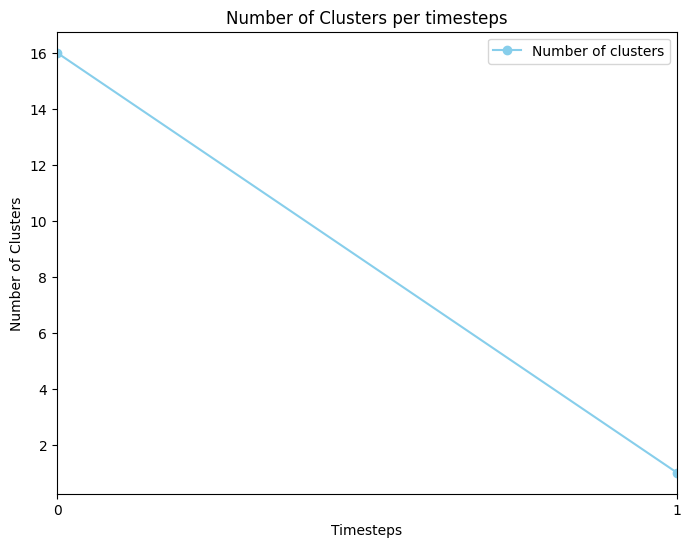

In [8]:
# Test the functions
graph_diffusion = remove_consecutive_duplicates(graph_diffusion)
# Number of clusters for each graph
for i, G in enumerate(graph_diffusion):
    print(f'Graph {i}: Number of clusters = {number_of_clusters(G)}')

run_evaluation(graph_diffusion)
# Plot the comparison of number of edges over time
plot_clusters(graph_diffusion)

Graph 0: Number of clusters = 16
Graph 1: Number of clusters = 8
Graph 2: Number of clusters = 4
Graph 3: Number of clusters = 2
Graph 4: Number of clusters = 1
Final Composition Ratio: 1.0
Mean Edge Retention Ratio: 1.0
Mean Compositional Score: (1.0, [1, 1, 1, 1])


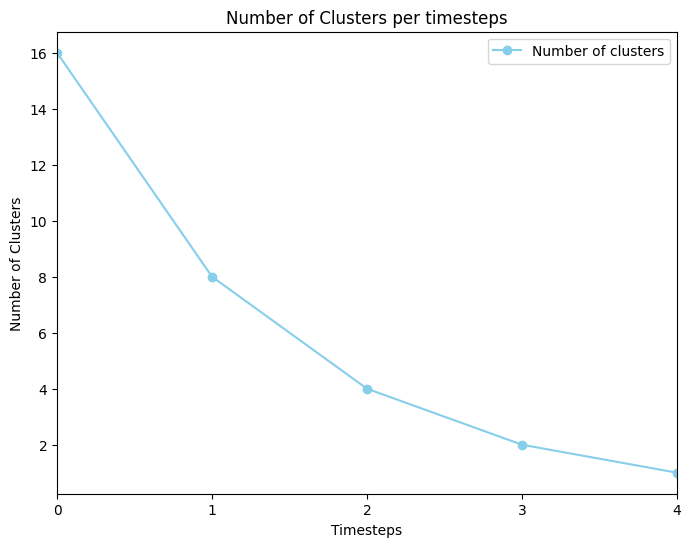

In [9]:
# Test the functions
graph_comps = remove_consecutive_duplicates(graph_comps)
# Number of clusters for each graph
for i, G in enumerate(graph_comps):
    print(f'Graph {i}: Number of clusters = {number_of_clusters(G)}')

run_evaluation(graph_comps)
# Plot the comparison of number of edges over time
plot_clusters(graph_comps)

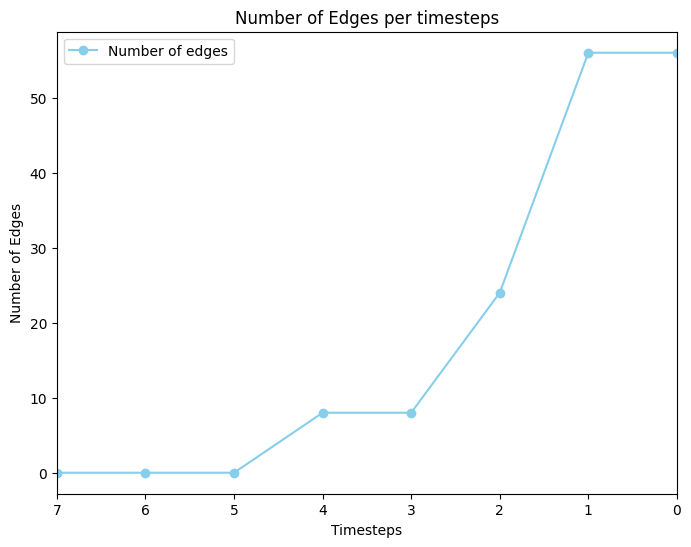

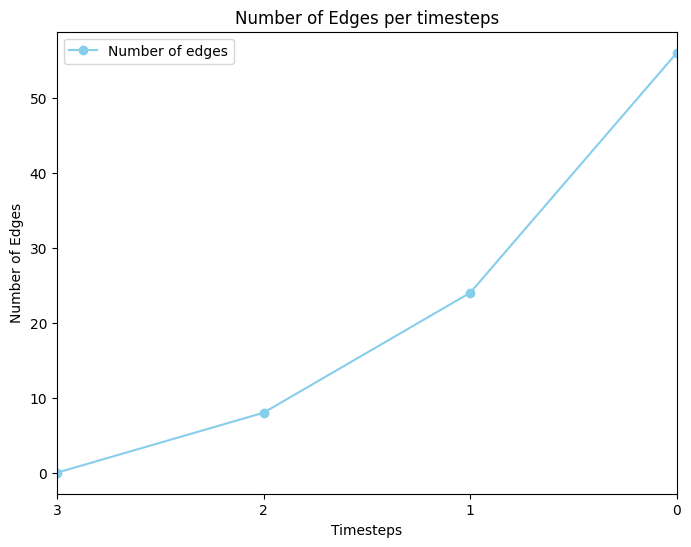

In [10]:
G = nx.Graph()
grid_points = [(i, j) for i in range(4) for j in range(4)]  # 2 rows and 4 columns
for i, point in enumerate(grid_points):
    G.add_node(i, pos=point)

# Define scale factors to test
identity = lambda x: x

phase = [identity, identity, identity, comp_first_pass, comp_first_pass, comp_second_pass , comp_third_pass, comp_third_pass]
G_scaled = G.copy()
graph_comps = []

for i, phase in enumerate(phase):
    G_scaled = phase(G)
    add_dist_edges(G_scaled, 0.1)
    graph_comps.append(G_scaled)
    # plot_graph(G_scaled, f'Phase {i}')

plot_edges(graph_comps)
plot_edges(remove_consecutive_duplicates(graph_comps))

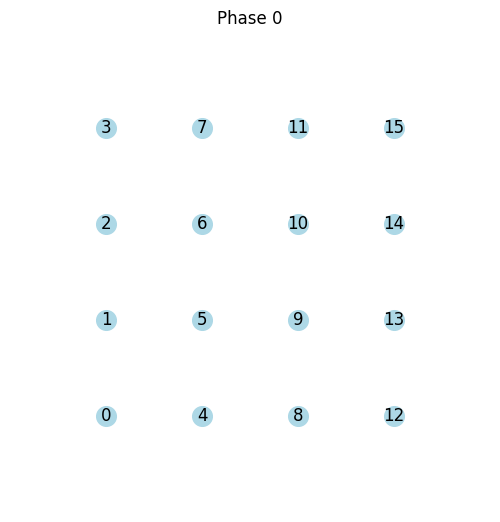

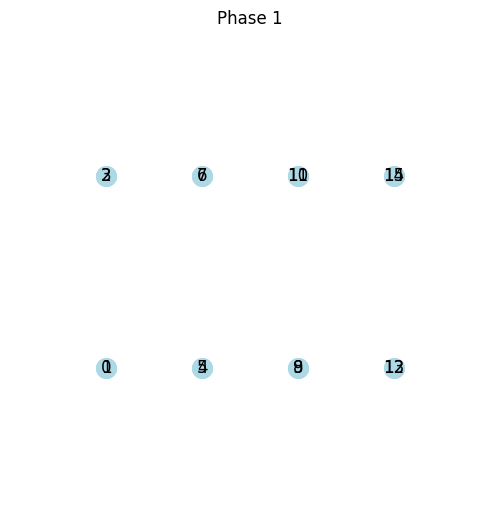

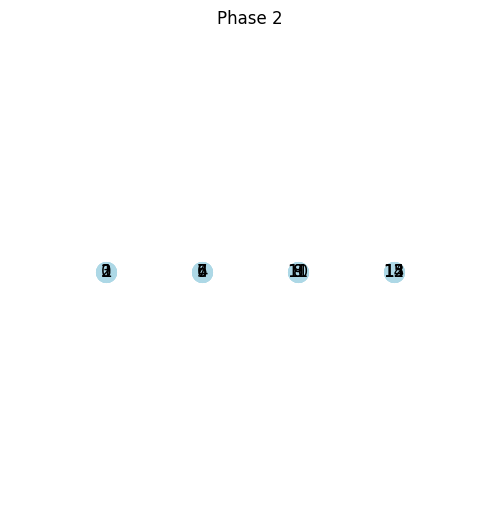

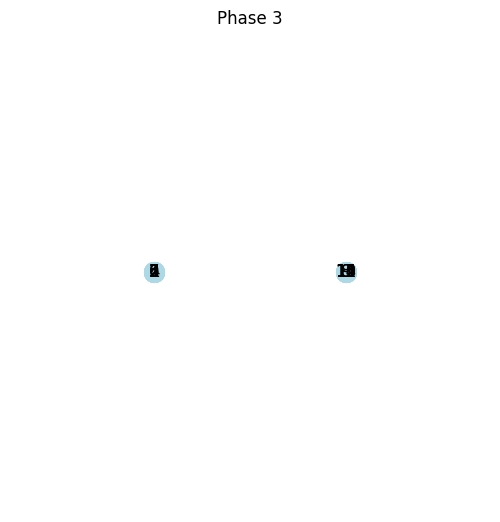

In [11]:
for i, g in enumerate(remove_consecutive_duplicates(graph_comps)):
    plot_graph(g, f'Phase {i}')
